<a href="https://colab.research.google.com/github/Wal14ber/projeto-seguranca-rr/blob/main/projeto_seguranca_rr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving MORTES VIOLENTAS INTENCIONAIS - 2019 A 2024 OK.xlsx to MORTES VIOLENTAS INTENCIONAIS - 2019 A 2024 OK (1).xlsx
.config
MORTES VIOLENTAS INTENCIONAIS - 2019 A 2024 OK (1).xlsx
MORTES VIOLENTAS INTENCIONAIS - 2019 A 2024 OK.xlsx
seguranca_rr.db
sample_data


/tmp/ipython-input-588037744.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total", y="MUNICIPIO", data=ranking_2023, palette="Reds_d")


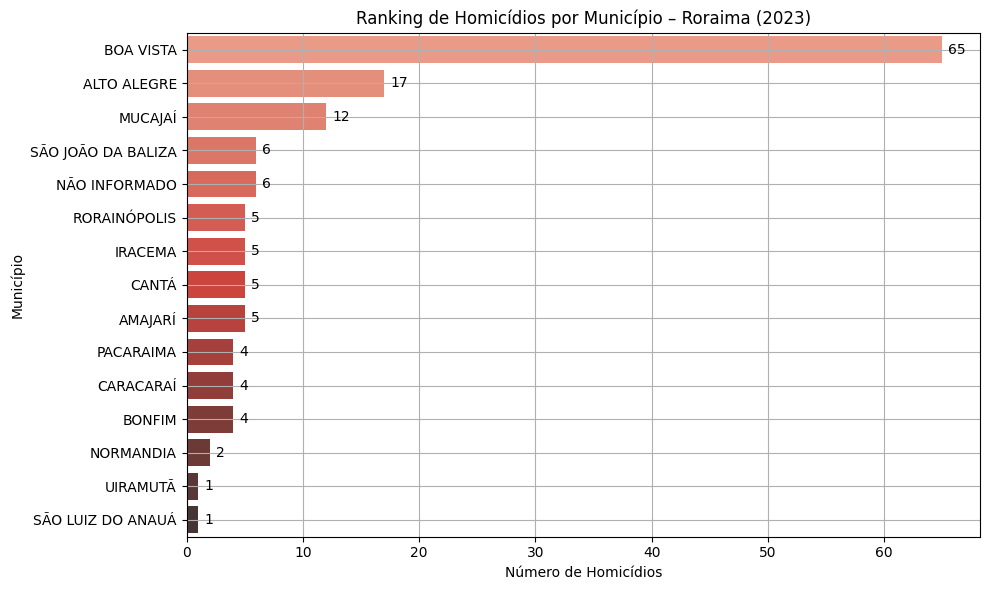

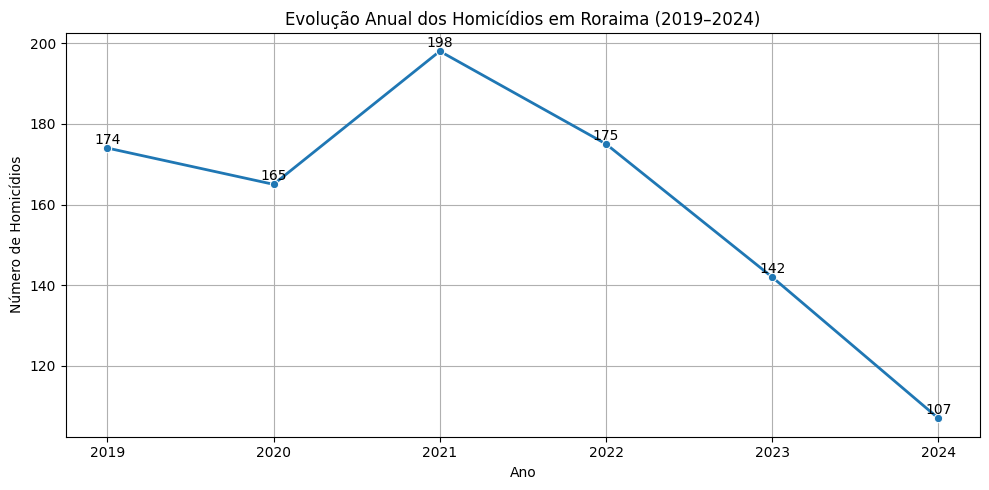

In [3]:
# ETAPA 1 – Importar bibliotecas
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import os

from google.colab import files
uploaded = files.upload()

import os

for f in os.listdir():
    print(f)



# ETAPA 2 – Carregar o arquivo Excel
arquivo = 'MORTES VIOLENTAS INTENCIONAIS - 2019 A 2024 OK.xlsx'

# Verifica se o arquivo existe antes de tentar ler
if not os.path.exists(arquivo):
    raise FileNotFoundError(f"Arquivo não encontrado: {arquivo}")

# ETAPA 3 – Ler a aba, pulando as 6 primeiras linhas
df = pd.read_excel(arquivo, sheet_name="BASE DE DADOS", skiprows=6)

# ETAPA 4 – Renomear colunas
df.columns = [
    "ITEM", "MES", "ANO", "DATA_OCORRENCIA", "MUNICIPIO", "BAIRRO", "NACIONALIDADE",
    "SEXO", "RACA_COR", "INSTRUMENTO_MEIO", "CARACTERISTICA_ARMA", "TIPIFICACAO",
    "EXTRA1", "EXTRA2", "EXTRA3", "EXTRA4", "EXTRA5"
]

# Filtrar e limpar
df = df[[
    "ANO", "DATA_OCORRENCIA", "MUNICIPIO", "SEXO", "RACA_COR",
    "INSTRUMENTO_MEIO", "TIPIFICACAO"
]].dropna(subset=["MUNICIPIO", "TIPIFICACAO"])

# Limpeza preventiva de texto
df["MUNICIPIO"] = df["MUNICIPIO"].str.strip().str.upper()
df["TIPIFICACAO"] = df["TIPIFICACAO"].str.strip().str.upper()

# Garantir tipo correto da coluna ANO
df["ANO"] = pd.to_numeric(df["ANO"], errors="coerce").fillna(0).astype(int)

# ETAPA 5 – Inserir no banco SQLite
conn = sqlite3.connect("seguranca_rr.db")
df.to_sql("ocorrencias", conn, if_exists="replace", index=False)

# ETAPA 6 – Consulta: Ranking por município (2023)
query1 = """
SELECT MUNICIPIO, COUNT(*) AS total
FROM ocorrencias
WHERE TIPIFICACAO = 'HOMICÍDIO' AND ANO = 2023
GROUP BY MUNICIPIO
ORDER BY total DESC
"""
ranking_2023 = pd.read_sql_query(query1, conn)

# Gráfico 1 – Ranking
plt.figure(figsize=(10, 6))
sns.barplot(x="total", y="MUNICIPIO", data=ranking_2023, palette="Reds_d")
plt.title("Ranking de Homicídios por Município – Roraima (2023)")
plt.xlabel("Número de Homicídios")
plt.ylabel("Município")
plt.grid(True)

# Adicionar labels no gráfico
for i, val in enumerate(ranking_2023["total"]):
    plt.text(val + 0.5, i, str(val), va='center')

plt.tight_layout()
plt.show()

# ETAPA 7 – Consulta: Evolução Anual
query2 = """
SELECT ANO, COUNT(*) AS total
FROM ocorrencias
WHERE TIPIFICACAO = 'HOMICÍDIO'
GROUP BY ANO
ORDER BY ANO
"""
homicidios_ano = pd.read_sql_query(query2, conn)

# Gráfico 2 – Evolução
plt.figure(figsize=(10, 5))
sns.lineplot(data=homicidios_ano, x="ANO", y="total", marker="o", linewidth=2)
plt.title("Evolução Anual dos Homicídios em Roraima (2019–2024)")
plt.xlabel("Ano")
plt.ylabel("Número de Homicídios")
plt.grid(True)

# Adicionar labels nos pontos
for i in range(len(homicidios_ano)):
    plt.text(
        homicidios_ano["ANO"][i],
        homicidios_ano["total"][i] + 1,
        str(homicidios_ano["total"][i]),
        ha='center'
    )

plt.tight_layout()
plt.show()

# ETAPA FINAL – Fechar conexão
conn.close()
